## 04.22

In [2]:
# 함수 정의

f = {
    1:2,
    2:4,
    3:6,
    4:8,
    5:10
}

In [6]:
f[1]

2

In [7]:
def f(x):
    return 2*x

x = 10
y = f(x)
print("f({}) = {})".format(x,y))

f(10) = 20)


### 막간 format() 함수 복습

- 문자열을 다양한 형태로 포맷팅하는 함수.
- 문자열 안에 {}기호를 사용하여 값을 삽입. 

In [8]:
# format 예시 1
name = "Bob"
age = 30

print("My name is {0} and I'm {1:.2f} years old.".format(name, age)) #소수점 둘째자리까지 출력

My name is Bob and I'm 30.00 years old.


In [11]:
# np.sign () :부호함수.  양수이면 1, 음수이면 -1, 0이면 0

import numpy as np
np.sign(-0.0001),np.sign(0), np.sign(0.0001)

(-1.0, 0, 1.0)

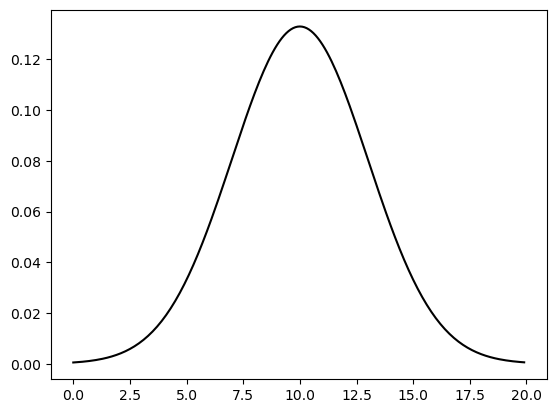

In [13]:
#Q. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x_plot = np.arange(0,20,0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot,loc=10,scale=3), color='black')
plt.show()

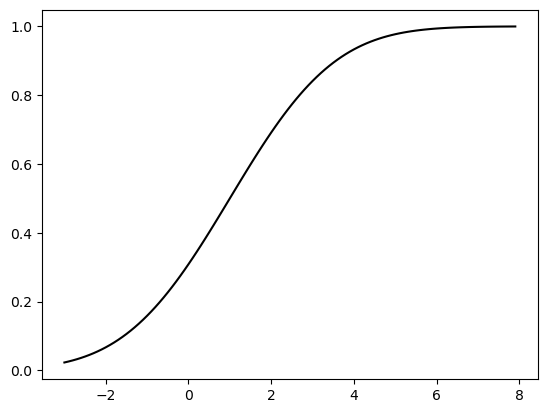

In [14]:
#Q. 평균이 1. 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현

import matplotlib.pyplot as plt
x_plot = np.arange(-3, 8 ,0.1)
plt.plot(x_plot, stats.norm.cdf(x=x_plot, loc=1, scale=2),color='black')

In [16]:
def f(x):
    return x**3 - 3 * x**2 + x    # X의 3제곱  - 3 곱하기 X의 자승 + X 
x = np.linspace(-1,3,9)
y = f(x)

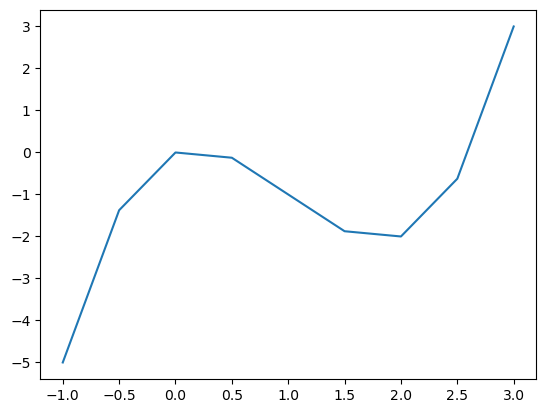

In [17]:
# f(x) 를 그래프로 표현

plt.plot(x,y)

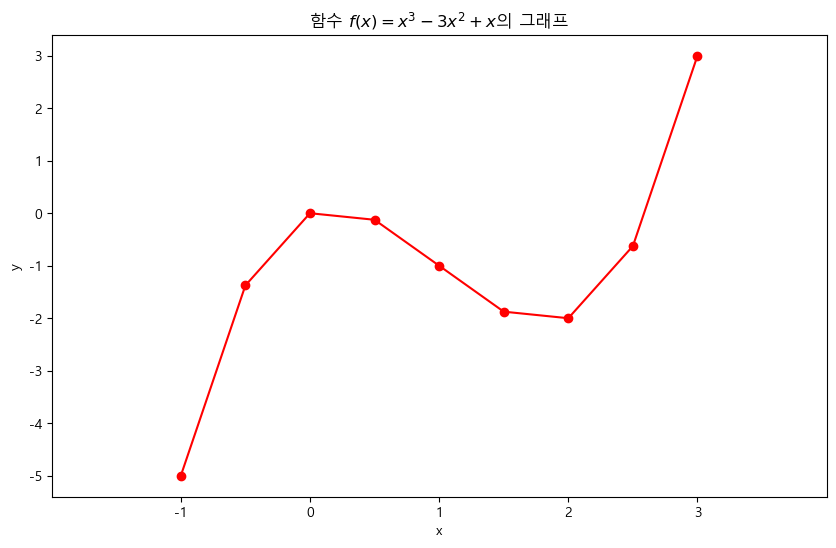

In [19]:
# 고급화 버젼 

from matplotlib import rc
import matplotlib as mpl

mpl.rc('font',family='Malgun Gothic') #한글포트 설정
mpl.rcParams['axes.unicode_minus']=False #마이너스 단위 처리

plt.figure(figsize=(10,6))

plt.plot(x,y,'ro-') # ro- : r=red, o= o모양의 점(marker), - =실선

plt.xlim(-2,4) # plt.xlim() 함수는 인자로 시작값(start)과 끝값(end)을 받아서 x축의 범위를 설정

plt.title("함수 $f(x) = x^3 - 3x^2 + x$의 그래프")

plt.xlabel("x")
plt.ylabel("y")
plt.xticks(np.arange(-1,4)) #x축의 눈금을 -1부터 4까지 설정
plt.yticks(np.arange(-5,4)) #y축의 눈금을 -5부터 4까지 설정
plt.show()


#### 역함수
- 어떤 함수의 입력/출력 관계와 정반대의 입출력 관계를 갖는 함수 
- 원래의 함수에서 x축과 y축이 바뀐것이므로 y=x가 나타내는 직선을 대칭축으로 대칭인 함수의 그래프

In [ ]:
def f1(x):
    return x**2
def f1inv(x):
    return np.sqrt(x)

x = np.linspace(0,3,300)

plt.figure(figsize = (10,6))

plt.plot(x, f1(x),'r-', label = "함수 $f(x) = x^2$" )

plt.plot(x, f1inv(x), "b-.", label="역함수 $f^{-1}(x) = \sqrt{x}$")

plt.plot(x,x,"g--")

plt.axis('equal') # plt.axis('equal'): 그래프의 축 범위를 동일하게 설정하는 함수
                 #x축과 y축의 스케일(scale)이 다르면, 그래프가 눌리거나 늘어져 보일 수 있음
                 #x축과 y축의 스케일을 동일하게 설정하여 그래프가 비정상적으로 보이는 것을 방지하는 함수
plt.xlim(0,2)
plt.ylim(0,2)
plt.legend()
plt.title('역함수 그래프')
plt.show()

#### 함수의 역함수를 구하는 과정
- 원래 함수의 x와 y를 바꿔준다.
- 바뀐 함수를 y에 대해서 푼 후, x로 정리한다. 

### ReLU
- 인공 신경망에서 가장 기본적인 활성화 함수 중 하나.<br><br>
- 입력값이 0보다 작을 때는 0으로, 0보다 크거나 같을 때는 입력값을 그대로 출력하는 함수.
    - ex) f(x) = max(0, x)<br><br>
- 특징 
    - 연산이 단순하고 계산속도가 빠름.
    - 입력값이 0보다 작을 때는 0을 출력하기 때문에, 일종의 스파스성(Sparsity)을 가지게 됩니다. 이러한 특성으로 인해 인공 신경망이 더욱 효과적으로 학습할 수 있게 됩니다.
        - 스파스성(Sparsity): 희소성이라고도 불리며, 주어진 데이터에서 대부분의 값이 0인 경우.
             => 데이터의 차원(dimensionality)이 높아지면서 발생하는 현상
    -  입력값이 0보다 작을 때는 기울기(gradient)가 0이 되기 때문에, 
       <br>해당 구간에서는 역전파(backpropagation) 과정에서 더 이상의 학습이 이루어지지 않게 됩니다. 
       <br>이를 '죽은 ReLU(dead ReLU)'라고 부르며, 이를 방지하기 위해 다양한 변형된 ReLU 함수가 제안되기도 함.

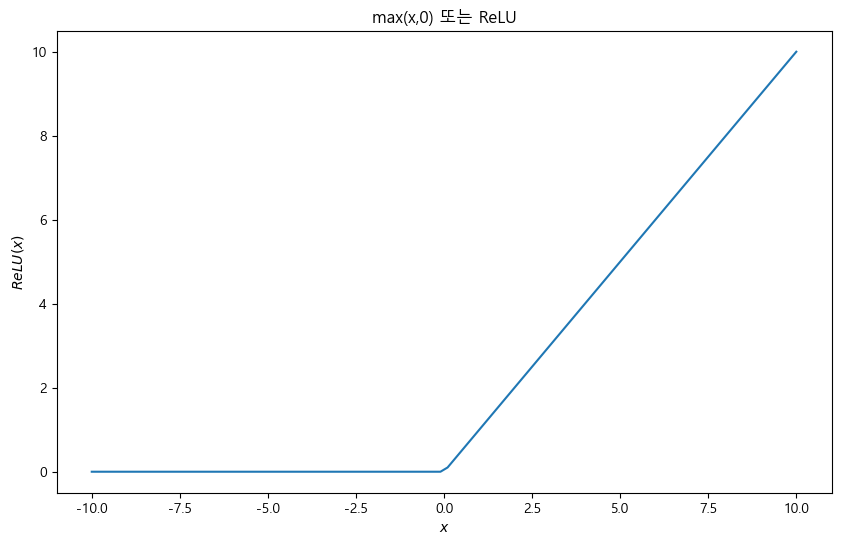

In [20]:
# ReLU

xx  = np.linspace(-10,10,100) #-10부터 10까지의 구간을 100개의 구간으로 쪼갠 값을 생성

plt.figure(figsize=(10,6))

plt. plot(xx, np.maximum(xx,0)) #xx의 각 원소와 0을 비교하여 큰 값을 반환하는 값들로 이루어진 배열을 생성
                                #이 배열의 각 원소는 입력값 x가 ReLU 함수에 입력되었을 때의 출력값
                                # = x축이 -10부터 10까지, y축이 0부터 10까지인 그래프가 생성

plt.title('max(x,0) 또는 ReLU')
plt.xlabel('$x$')  # $는 수식을 쓸 때 사용
plt.ylabel('$ReLU(x)$')
plt.show()

<font color=green>↑↑↑ 0 이하는 모두 0으로 표시되고 0 이후의 숫자는 제값을 나타내는 ReLU의 특성을 반영↑↑↑</font>

### 지수함수
- 정해진 어떤 값을 입력값으로 거듭제곱하여 출력하는 함수
- 거듭제곱을 할 때 아래에 있는 수를 밑이라고 하며 밑을 오일러 수 e(약 2.718)로 하여 거듭제곱하는 함수
- $y=e^x$, y=exp(x) = exp x 로 표시
     - 로그함수의 밑으로 자연로그 함수(ln)을 사용하는데 이 때 밑이 올일러 상수e이다. 
<br>(e는 확률분포에서 많이 사용되는데 정규분포에서 e의 지수 함수 형태인 exp(-x^2/2))


In [21]:
import math
print(math.e)

2.718281828459045


### 로그 함수 log()
- 로그 함수는 양의 실수를 입력받아 음이 아닌 실수를 출력하는 함수
- 밑(base)이라는 값에 따라 여러 종류의 함수가 존재하며, 자주 사용되는 밑은 자연로그를 의미하는 밑 e이 있다.
- 자연로그(logarithm)는 밑이 e인 로그 함수를 말하며, ln(x) 또는 log_e(x)로 표기
    - 자연로그 함수는 e의 거듭제곱 함수의 역함수로 정의
    - ln(x)는 e를 어떤 양수 값으로 거듭제곱한 결과가 x가 되는 값 
    - ※ 참고로 in 아님.소문자  LN임

In [22]:
# 로그 함수의 밑이 e인 경우

x = 10
y = math.log(x)
y

2.302585092994046

In [23]:
# 로그 함수의 밑이 다른 수 인 경우 ( 로그 10의 10은 1이다. = 10의 1승은 10이니까 )

x = 10
base = 10
y = math.log(x,base)
y

1.0

In [24]:
print(np.exp(-10))
print(np.exp(-1))
print(np.exp(-0.1))
print(np.exp(0)) #☆
print(np.exp(0.1))
print(np.exp(1)) #☆ e의 1승은 e. e=오일러수 2.718*****
print(np.exp(10))

4.5399929762484854e-05
0.36787944117144233
0.9048374180359595
1.0
1.1051709180756477
2.718281828459045
22026.465794806718


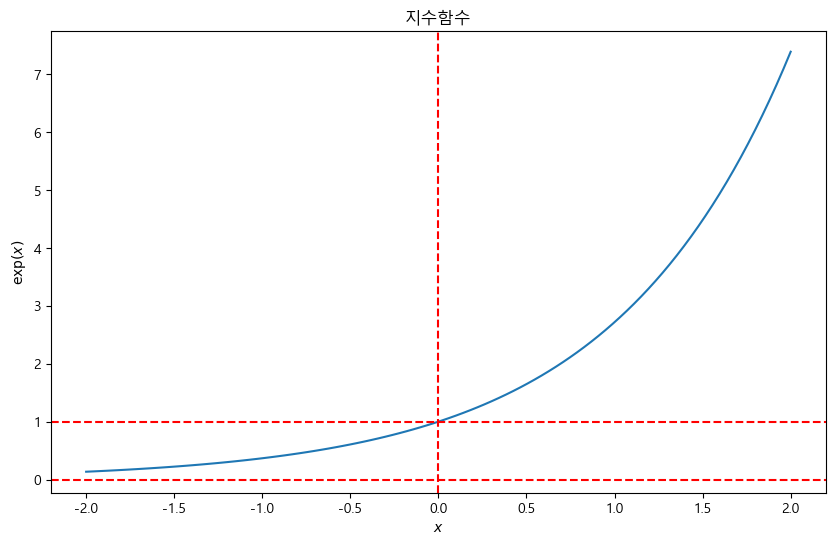

In [25]:
xx = np.linspace(-2,2,100)
yy = np.exp(xx)
plt.figure(figsize = (10,6))
plt.title('지수함수')
plt.plot(xx,yy)
plt.axhline(1,c='r',ls = '--') #엘에스ls
plt.axhline(0,c='r',ls = '--')
plt.axvline(0,c='r',ls = '--')
plt.xlabel('$x$')
plt.ylabel('$\exp(x)$')
plt.show()

In [26]:
print(np.exp(100))

2.6881171418161356e+43


Q1. 다음을 수행하세요.
1. np.arange(9)로 구성된 정방행렬
2. 주 대각선 원소가 [1,2,3]인 대각 정방행렬
3. 3행 3열로 구성된 항등행렬 (단위행렬)
4. 3행 1열로 구성된 영벡터

In [27]:
#np.arange(9)로 구성된 정방행렬
a=np.arange(9).reshape(3,3)
print(a,'\n')

#주 대각선 원소가 [1,2,3]인 대각 정방행렬
b = np.diag([1,2,3])
print(b,'\n')

#3행 3열로 구성된 항등행렬 (단위행렬)
c = np.eye(3)
print(c,'\n')

#3행 1열로 구성된 영벡터
d= np.zeros((3,1))
print(d)

[[0 1 2]
 [3 4 5]
 [6 7 8]] 

[[1 0 0]
 [0 2 0]
 [0 0 3]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[0.]
 [0.]
 [0.]]


Q2. mt1 행렬에 대하여 다음을 수행하세요.
<br>1.역행렬 mt2를 구하고
<br>2.mt1과 mt2를 내적하여 단위행렬을 출력

In [28]:
np.random.seed(0)
mt1 = np.random.randint(1,4,size = (3,3))
mt1

array([[1, 2, 1],
       [2, 2, 3],
       [1, 3, 1]])

In [29]:
#역행렬 mt2를 구하고

mt2 = np.linalg.inv(mt1)
mt2


#mt1과 mt2를 내적하여 단위행렬을 출력
mt1@mt2

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Q3. 행렬식의 기하학적 성질은 부피를 의미하며, 2 * 2행렬 A의 행렬식은 일종의 넓이로 이해할 수 있다.
[[2,0],[0,2]] 배열에 대하여 행렬식을 이용하여 면적을 구하세요.

In [30]:
n=np.array([[2,0],[0,2]])
n2=np.linalg.det(n)
n2

4.0

## 과제 2_0421
위의 그래프를 x,y구근을 400으로 조밀하게 변경하여 다시 표현하세요

#### 과제3_0421
다음 함수의 역함수를 구하고 그래프로 표현하세요.

In [ ]:
def f(x):
    return (x**2 + 1)
def finv(x):
    return np.sqrt(x-1)  #역함수


### 과제 4_0421
로그함수를 시각화하여 표현하세요

In [ ]:
np.log(x)

### 과제 5_0421. 다음을 수행하세요.
1. np.arange(9)로 구성된 정방행렬
2. 주대각선 원소가 [1,2,3]인 대각 정방행렬
3. 3행 3열로 구성된 항등행렬 (단위행렬)
4. 3행 1열로 구성된 영백터

### 과제 6_0421. 
mt1 행렬에 대하여 다음을 수행하세요.

 1. 역행렬 mt2를 구하고
 2. mt1 과 mt2를 내적하여 단위행렬을 출력